####Команда С4В
**Участники команды:**

Кулибаба Степан - капитан команды, отвечал за нейросеть

Cемен Рябов - опытный специалист, отвечал за приложение

Светлана Иванова - специалист,отвечала за поиск информации, сбор датасета, помощь другим участникам


**Использовали:**

PixelLib - нейросеть для детектирования людей

VGG16 - нейросеть для распонавания СИЗ

###1 Этап: детектирование людей

In [ ]:
pip install -U pixellib tensorflow-gpu

In [ ]:
pip install utils

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
from pixellib.instance import instance_segmentation


def object_detection_on_an_image():
    segment_image = instance_segmentation()
    segment_image.load_model("/content/drive/MyDrive/Neural-Network/mask_rcnn_coco.h5")

    target_class = segment_image.select_target_classes(person=True)

    result = segment_image.segmentImage(
        image_path="/content/image_1.png",
        show_bboxes=True,
        segment_target_classes=target_class,
        extract_segmented_objects=True,
        save_extracted_objects=True,
        output_image_name="output.jpg"
    )

Processed image saved successfully in your current working directory.


###2 Этап: распознавание СИЗ

In [75]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

In [112]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from tensorflow.keras import backend
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.applications.vgg16 import preprocess_input
import numpy as np

from sklearn import preprocessing
from sklearn import model_selection
from tensorflow.keras.optimizers import Adam
import math

**Подготовка датасета**

In [35]:
# Каталог с данными для обучения
train_dir = '/content/drive/MyDrive/Neural-Network/train'
# Каталог с данными для проверки
val_dir = '/content/drive/MyDrive/Neural-Network/val'
# Каталог с данными для тестирования
test_dir = '/content/drive/MyDrive/Neural-Network/test'
# Размеры изображения
img_width, img_height = 150, 150
# Размерность тензора на основе изображения для входных данных в нейронную сеть
# backend Tensorflow, channels_last
input_shape = (img_width, img_height, 3)
# Размер мини-выборки
batch_size = 64
# Количество изображений для обучения
nb_train_samples = 2000
# Количество изображений для проверки
nb_validation_samples = 1000
# Количество изображений для тестирования
nb_test_samples = 1000

In [36]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

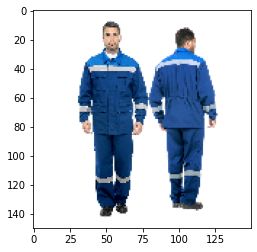

In [37]:
image_file_name = train_dir + '/yes/2eff1075f05fee5931e0261496c16a2d.png'
img = image.load_img(image_file_name, target_size=(150, 150))
plt.imshow(img)

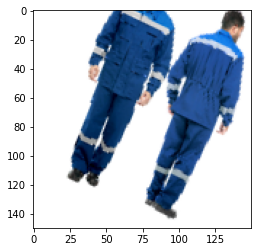

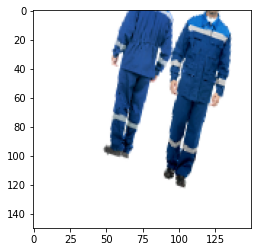

In [38]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 2 == 0:
        break
plt.show()

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

In [41]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [43]:
val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20 images belonging to 2 classes.


In [44]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 20 images belonging to 2 classes.


**Нейросеть**

In [26]:
vgg16_net = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [45]:
vgg16_net.trainable = False

In [46]:
model = Sequential()
# Добавляем в модель сеть VGG16 вместо слоя
model.add(vgg16_net)
model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [47]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(), 
              metrics=['accuracy'])

In [62]:
callback_list = [ModelCheckpoint('save/mnist-dense.hdf5', monitor='val_loss', save_best_only=True)]

In [65]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=5,
    epochs=5,
    validation_data=val_generator,
    validation_steps=25,
    callbacks=callback_list)

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


5/5 [==============================] - 153s 34s/step - batch: 2.0000 - size: 27.4000 - loss: 0.6468 - accuracy: 0.7664 - val_loss: 0.1280 - val_accuracy: 1.0000
Epoch 2/5
5/5 [==============================] - 175s 40s/step - batch: 2.0000 - size: 39.6000 - loss: 0.3947 - accuracy: 0.8636 - val_loss: 0.4346 - val_accuracy: 0.8000
Epoch 3/5
5/5 [==============================] - 156s 36s/step - batch: 2.0000 - size: 27.4000 - loss: 0.7291 - accuracy: 0.7445 - val_loss: 0.1894 - val_accuracy: 0.9000
Epoch 4/5
5/5 [==============================] - 166s 38s/step - batch: 2.0000 - size: 39.6000 - loss: 0.3573 - accuracy: 0.8232 - val_loss: 0.1601 - val_accuracy: 0.9000
Epoch 5/5
5/5 [==============================] - 164s 41s/step - batch: 2.0000 - size: 39.6000 - loss: 0.3453 - accuracy: 0.8333 - val_loss: 0.1393 - val_accuracy: 0.9000


In [ ]:
from PIL import Image

img = Image.open('image.png')
width = 64
height = 64
resized_img = img.resize((width, height), Image.ANTIALIAS)
resized_img.save(image.png)

In [127]:
model.load_weights('/content/save/mnist-dense.hdf5')

img = image.load_img("/content/sadsa.png", target_size=(150, 150))
p = image.img_to_array(img)
p = np.expand_dims(p, axis=0)
p = preprocess_input(p)
pred = model.predict(p)
print(("Не СИЗ", "СИЗ")[int(pred[0][0])])

Не СИЗ
1.5331427e-05


In [128]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 256)               2097408   
                                                                 
 activation_150 (Activation)  (None, 256)              0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
 activation_151 (Activation)  (None, 1)               